In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
Psy = pd.read_csv("Youtube01-Psy.csv")
Katy = pd.read_csv("Youtube02-KatyPerry.csv")
LMFAO = pd.read_csv("Youtube03-LMFAO.csv")
Eminem = pd.read_csv("Youtube04-Eminem.csv")
Shakira = pd.read_csv("Youtube05-Shakira.csv")

In [3]:
data = pd.concat([Psy, Katy, LMFAO, Eminem, Shakira])
data.drop(["COMMENT_ID", "DATE", "AUTHOR"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [4]:
print(data.head())

                                             CONTENT  CLASS
0  Huh, anyway check out this you[tube] channel: ...      1
1  Hey guys check out my new channel and our firs...      1
2             just for test I have to say murdev.com      1
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
4            watch?v=vtaRGgvGtWQ   Check this out .﻿      1


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB
None


In [6]:
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [7]:
data_dup = data.duplicated().any()
data_dup

True

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [9]:
data = data.drop_duplicates()

In [10]:
data_dup = data.duplicated().any()
data_dup

False

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 0 to 369
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1760 non-null   object
 1   CLASS    1760 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.2+ KB


In [12]:
data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [13]:
# Summary statistics of numerical columns
print(data.describe())

             CLASS
count  1760.000000
mean      0.477841
std       0.499651
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


CLASS
0    919
1    841
Name: count, dtype: int64


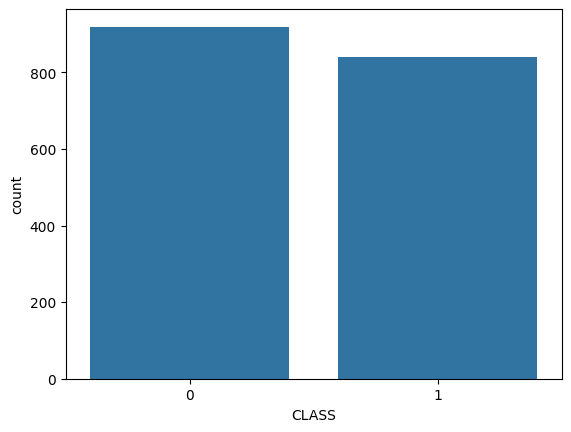

In [14]:
# Class distribution (assuming 'label' is the column indicating spam or not)
print(data['CLASS'].value_counts())

# Visualize class distribution
sns.countplot(x='CLASS', data=data)
plt.show()

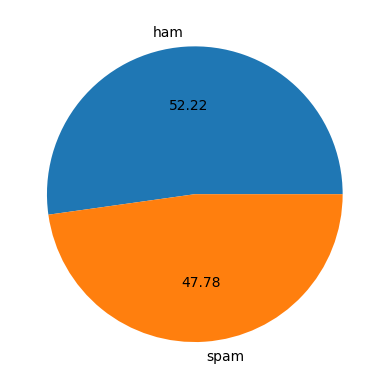

In [15]:
import matplotlib.pyplot as plt
plt.pie(data['CLASS'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
from nltk.corpus import stopwords
import string

In [17]:
def vectorizer(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()

    for i in text:
         if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    return " ".join(y)

In [18]:
import nltk
import re

# Download the required NLTK data files
nltk.download('punkt')

def transform(text):
    text = text.lower()  # Convert to lowercase
    words = nltk.word_tokenize(text)
    
    # Use regular expression to filter only alphabetical words
    filtered_words = [word for word in words if re.match('^[a-zA-Z]+$', word)]
    
    # Join the filtered words into a space-separated string
    result = ' '.join(filtered_words)
    
    return result

# Example usage
input_text = ('COMPUTER SCIENCE ENGINEERING?')
transformed_text = transform(input_text)
print(transformed_text)

computer science engineering


[nltk_data] Downloading package punkt to C:\Users\bayya
[nltk_data]     sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
import re
# Assuming you have a function named transformed_text
def transformed_text(text):
    # Remove special characters using regex
    text_without_special_chars = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Convert the text to lowercase
    transformed_result = text_without_special_chars.lower()
    return transformed_result

# Applying the function to the 'CONTENT' column
data['X'] = data['CONTENT'].apply(lambda x: transformed_text(x))

In [20]:
data.head()

,CONTENT,CLASS,X
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check out this youtube channel koby...
1,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test i have to say murdevcom
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watchvvtarggvgtwq check this out


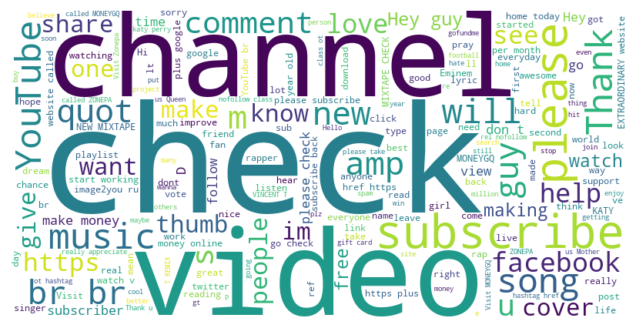

In [21]:
# Word cloud to visualize most common words in comments
spam_comments = ' '.join(data[data['CLASS'] == 1]['CONTENT'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_comments)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='CLASS', ylabel='Count'>

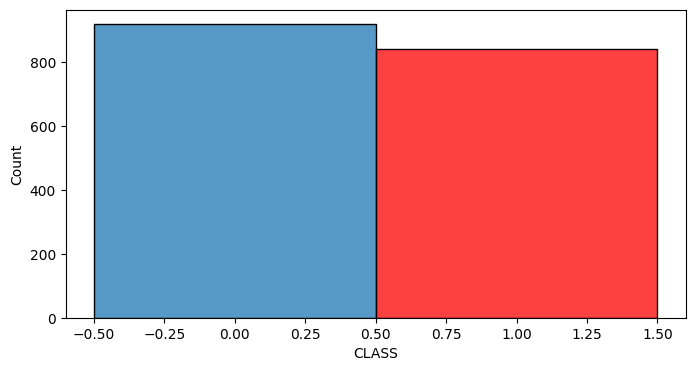

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(data[data['CLASS'] == 0]['CLASS'])
sns.histplot(data[data['CLASS'] == 1]['CLASS'],color='red')

In [23]:
#data processing
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [24]:
cate_val

['CLASS']

In [25]:
cont_val

['CONTENT', 'X']

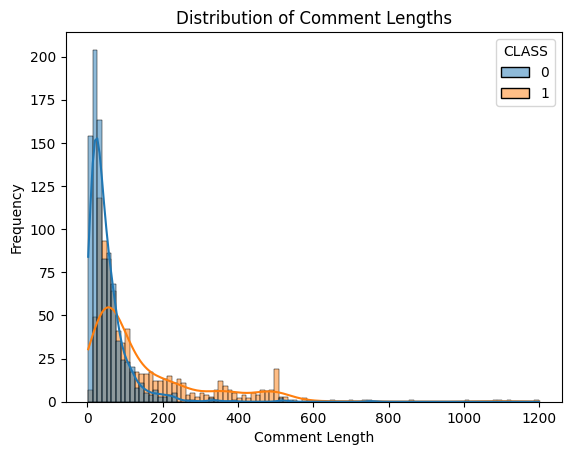

In [26]:
# Analyze comment lengths
data['comment_length'] = data['CONTENT'].apply(len)

# Visualize the distribution of comment lengths
sns.histplot(data, x='comment_length', hue='CLASS', kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Replace NaN values with empty strings
data['CONTENT'].fillna('', inplace=True)

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the 'CONTENT' column using TF-IDF vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(data['CONTENT'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [28]:
data.head()

,CONTENT,CLASS,X,comment_length
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check out this youtube channel koby...,56
1,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...,166
2,just for test I have to say murdev.com,1,just for test i have to say murdevcom,38
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy,48
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watchvvtarggvgtwq check this out,39


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 0 to 369
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CONTENT         1760 non-null   object
 1   CLASS           1760 non-null   int64 
 2   X               1760 non-null   object
 3   comment_length  1760 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 68.8+ KB


In [30]:
# Extract features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['CONTENT'])  # Change 'comment' to 'CONTENT'
# Get feature names
feature_names = vectorizer.get_feature_names_out()
# Display feature names and sample feature values
print("Feature Names:", feature_names[:10])
print("Sample Feature Values:", X.toarray()[:5, :10])

Feature Names: ['00' '000' '002' '018' '02' '034' '04' '047000' '05' '053012']
Sample Feature Values: [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [31]:
# Extract features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['CONTENT'])
# Get feature names
feature_names = vectorizer.get_feature_names_out()
# Convert to DataFrame
X_df = pd.DataFrame(X.toarray(), columns=feature_names)

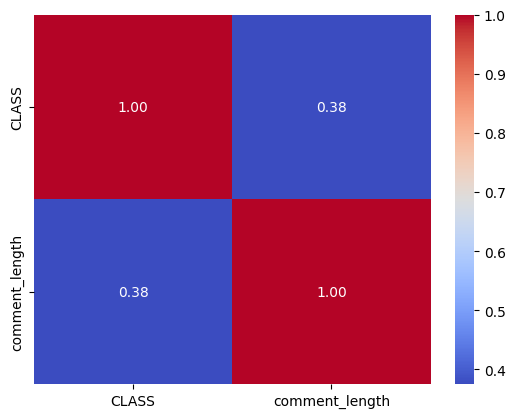

In [32]:
# Assuming 'CLASS' is the column you want to correlate with 'CONTENT'
columns_of_interest = ['CONTENT', 'CLASS','X','comment_length']

# Select only the numeric columns of interest
numeric_columns_of_interest = data[columns_of_interest].select_dtypes(include=['int64']).columns
# Calculate the correlation matrix
correlation_matrix = data[numeric_columns_of_interest].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [34]:
print(data.columns)

Index(['CONTENT', 'CLASS', 'X', 'comment_length'], dtype='object')


In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [36]:
X = tfidf.fit_transform(data['CONTENT']).toarray()

In [37]:
X.shape

(1760, 4454)

In [38]:
y =data['CLASS'].values

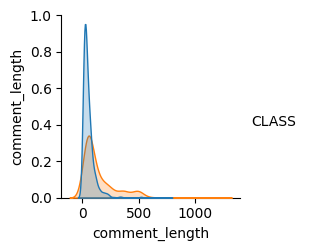

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame
sns.pairplot(data, hue='CLASS')
plt.show()

In [40]:
X = data.drop('CLASS',axis=1)
y = data['CLASS']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_test

108    1
432    1
274    0
110    0
345    0
      ..
145    0
17     1
113    0
240    0
32     1
Name: CLASS, Length: 352, dtype: int64

In [42]:
X_train

,CONTENT,X,comment_length
200,http://www.twitch.tv/tareko100 Follow him on t...,httpwwwtwitchtvtareko100 follow him on twitch ...,197
5,Shuffle﻿,shuffle,8
177,https://www.facebook.com/pages/Hiphop-Express/...,httpswwwfacebookcompageshiphopexpress704682339...,96
310,Could you please check out my covers on my cha...,could you please check out my covers on my cha...,258
183,plz i wilsubscribe me frndzzl subscribe u back,plz i wilsubscribe me frndzzl subscribe u back,47
...,...,...,...
114,Do you need more instagram followers or photo ...,do you need more instagram followers or photo ...,97
294,Best song﻿,best song,10
174,I hate it when Laura Bennett comes in﻿,i hate it when laura bennett comes in,38
21,Like﻿,like,5


In [43]:
y_test

108    1
432    1
274    0
110    0
345    0
      ..
145    0
17     1
113    0
240    0
32     1
Name: CLASS, Length: 352, dtype: int64

In [44]:
data.head()

,CONTENT,CLASS,X,comment_length
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check out this youtube channel koby...,56
1,Hey guys check out my new channel and our firs...,1,hey guys check out my new channel and our firs...,166
2,just for test I have to say murdev.com,1,just for test i have to say murdevcom,38
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy,48
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watchvvtarggvgtwq check this out,39


In [45]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Create Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Assuming you have a DataFrame df with 'CONTENT' and 'CLASS' columns
X = data['CONTENT']
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train_tfidf.toarray(), y_train)

# Make predictions
y_pred = gnb.predict(X_test_tfidf.toarray())

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7954545454545454
Precision: 0.8248175182481752
Confusion Matrix:
 [[167  24]
 [ 48 113]]


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
# Assuming you have a DataFrame df with 'CONTENT' and 'CLASS' columns
X = data['CONTENT']
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier
mnb.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = mnb.predict(X_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9090909090909091
Precision: 0.9056603773584906
Confusion Matrix:
 [[176  15]
 [ 17 144]]


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Assuming you have a DataFrame df with 'CONTENT' and 'CLASS' columns
X = data['CONTENT']
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Train the classifier
bnb.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = bnb.predict(X_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.875
Precision: 0.9465648854961832
Confusion Matrix:
 [[184   7]
 [ 37 124]]


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Assuming you have a DataFrame df with 'CONTENT' and 'CLASS' columns
X = data['CONTENT']
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Logistic Regression classifier
lr = LogisticRegression()

# Train the classifier
lr.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lr.predict(X_test_tfidf)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9488636363636364
Precision: 0.949685534591195
Confusion Matrix:
 [[183   8]
 [ 10 151]]


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Assuming you have a DataFrame df with 'CONTENT' and 'CLASS' columns
X = data['CONTENT']
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Random Forest classifier
rf = RandomForestClassifier()
# Train the classifier
rf.fit(X_train_tfidf, y_train)
# Make predictions
y_pred = rf.predict(X_test_tfidf)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9573863636363636
Precision: 0.967948717948718
Confusion Matrix:
 [[186   5]
 [ 10 151]]


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Assuming you have a DataFrame df with 'CONTENT' and 'CLASS' columns
X = data['CONTENT']
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create classifiers
clfs = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

# Train and evaluate classifiers
for name, clfs in clfs.items():
    if name == 'GaussianNB':
        # Convert sparse matrices to dense arrays for Gaussian Naive Bayes
        X_train_dense = X_train_tfidf.toarray()
        X_test_dense = X_test_tfidf.toarray()
    else:
        X_train_dense = X_train_tfidf
        X_test_dense = X_test_tfidf
    
    clfs.fit(X_train_dense, y_train)
    y_pred = clfs.predict(X_test_dense)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"{name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

GaussianNB:
Accuracy: 0.7954545454545454
Precision: 0.8248175182481752
Confusion Matrix:
 [[167  24]
 [ 48 113]]


MultinomialNB:
Accuracy: 0.9090909090909091
Precision: 0.9056603773584906
Confusion Matrix:
 [[176  15]
 [ 17 144]]


BernoulliNB:
Accuracy: 0.875
Precision: 0.9465648854961832
Confusion Matrix:
 [[184   7]
 [ 37 124]]




In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Assuming you have a DataFrame df with 'CONTENT' and 'CLASS' columns
X = data['CONTENT']
y = data['CLASS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features parameter

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create classifiers
clfs = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
}

# Train and evaluate classifiers
for name, clfs in clfs.items():
    if name == 'LogisticRegression':
        # Convert sparse matrices to dense arrays for Gaussian Naive Bayes
        X_train_dense = X_train_tfidf.toarray()
        X_test_dense = X_test_tfidf.toarray()
    else:
        X_train_dense = X_train_tfidf
        X_test_dense = X_test_tfidf
    
    clfs.fit(X_train_dense, y_train)
    y_pred = clfs.predict(X_test_dense)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    print(f"{name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

LogisticRegression:
Accuracy: 0.9488636363636364
Precision: 0.949685534591195
Confusion Matrix:
 [[183   8]
 [ 10 151]]


RandomForest:
Accuracy: 0.9573863636363636
Precision: 0.9620253164556962
Confusion Matrix:
 [[185   6]
 [  9 152]]




In [58]:
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB()
}

In [59]:
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd

# Assuming you have already defined classifiers and X_train_tfidf, X_test_tfidf, y_train, y_test

# Store performance metrics
accuracy_scores = []
precision_scores = []

# Iterate over classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_tfidf.toarray(), y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_tfidf.toarray())
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Store performance metrics for later comparison
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

# Create a DataFrame with the results
performance_df = pd.DataFrame({
    'Algorithm': list(classifiers.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

# Display the results
print(performance_df)

            Algorithm  Accuracy  Precision
1        RandomForest  0.957386   0.956250
0  LogisticRegression  0.948864   0.949686
4         BernoulliNB  0.875000   0.946565
3       MultinomialNB  0.909091   0.905660
2          GaussianNB  0.795455   0.824818


In [60]:
performance_df

,Algorithm,Accuracy,Precision
1,RandomForest,0.957386,0.956250
0,LogisticRegression,0.948864,0.949686
4,BernoulliNB,0.875000,0.946565
3,MultinomialNB,0.909091,0.905660
2,GaussianNB,0.795455,0.824818


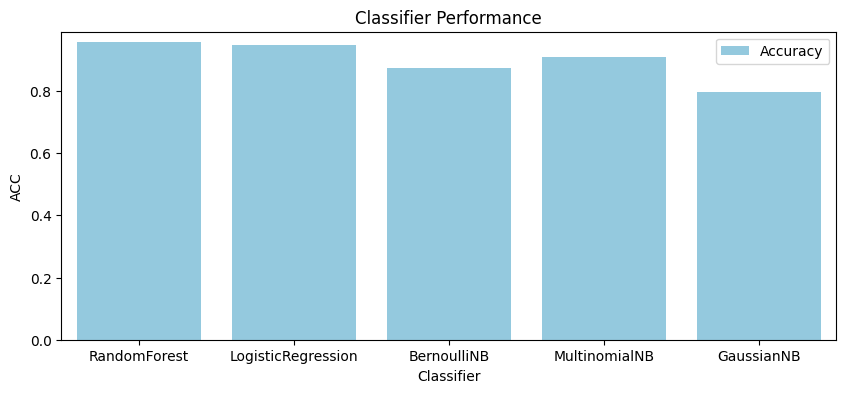

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 4))

# Plot accuracy
sns.barplot(x='Algorithm', y='Accuracy', data=performance_df, color='skyblue', label='Accuracy')

# Customize the plot
plt.title('Classifier Performance')
plt.xlabel('Classifier')
plt.ylabel('ACC')
plt.legend()

# Set y-axis limits
plt.ylim(0, 0.99)

# Show the plot
plt.show()


In [62]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tkinter import *

In [63]:
# Load the data
Psy = pd.read_csv("Youtube01-Psy.csv")
Katy = pd.read_csv("Youtube02-KatyPerry.csv")
LMFAO = pd.read_csv("Youtube03-LMFAO.csv")
Eminem = pd.read_csv("Youtube04-Eminem.csv")
Shakira = pd.read_csv("Youtube05-Shakira.csv")
df = pd.concat([Psy, Katy, LMFAO, Eminem, Shakira])
df.drop(["COMMENT_ID", "DATE", "AUTHOR"], axis=1, inplace=True)

In [64]:
# Preprocess the text data
def preprocess_text(CONTENT):
    without_punc = [char for char in CONTENT if char not in string.punctuation]
    without_punc = ''.join(without_punc)
    return ' '.join([word for word in without_punc.split() if word.lower() not in stopwords.words('english')])

df['CONTENT'] = df['CONTENT'].apply(preprocess_text)

In [66]:
# Feature extraction using CountVectorizer
x = df['CONTENT']
y = df['CLASS']
cv = CountVectorizer()
x = cv.fit_transform(x)

In [69]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# Create and train the Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [72]:
def youtube():
    lab = ['not spam', 'spam']
    x = cv.transform([e.get()]).toarray()
    p = classifier.predict(x)
    s = [str(i) for i in p]
    a = int("".join(s))
    res = str("This comment is " + lab[a])

    # Display the result in the Tkinter window with the desired text color
    result_label.config(text=res, fg="red" if lab[a] == 'spam' else "green")

In [73]:
# Tkinter GUI
root = Tk()
root.title('Youtube Spam Comment Detection')
root.geometry('400x400')

head = Label(root, text='Enter Comment', font=('helvetica', 24, 'bold'))
head.pack()
e = Entry(root, width=400, borderwidth=5)
e.pack()
b = Button(root, text='Predict', font=('helvetica', 20, 'bold'), fg='white', bg='green', command=youtube)
b.pack()

result_label = Label(root, text='', font=('helvetica', 15, 'bold'))
result_label.pack()

root.mainloop()